# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [18]:
# Load the dataset
# Place the correct path to the file you are reading here (Make sure to load using the relative path)

df = pd.read_csv('./data/Climate_Change_Indicators.csv')

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information: ")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [4]:
# TODO: Aggregate data by year to create a 124-year time series
df_yearly = df.groupby('Year').mean().reset_index()
print(f"Number of years: {len(df_yearly)}")
df_yearly.head()



Number of years: 124


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

Descriptive Statistics:

               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+06                     1.048576e+06             1.048576e+06   
mean   1.961505e+03                     1.449954e+01             3.500280e+02   
std    3.579736e+01                     8.661005e-01             4.042409e+01   
min    1.900000e+03                     1.300000e+01             2.800000e+02   
25%    1.930000e+03                     1.375000e+01             3.149900e+02   
50%    1.962000e+03                     1.450000e+01             3.500700e+02   
75%    1.993000e+03                     1.525000e+01             3.850200e+02   
max    2.023000e+03                     1.600000e+01             4.200000e+02   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count         1.048576e+06                   1.048576e+06  
mean          1.499900e+02                   9.000896e+00  
std           8.657659e+01                   3.462551e+00  
min  

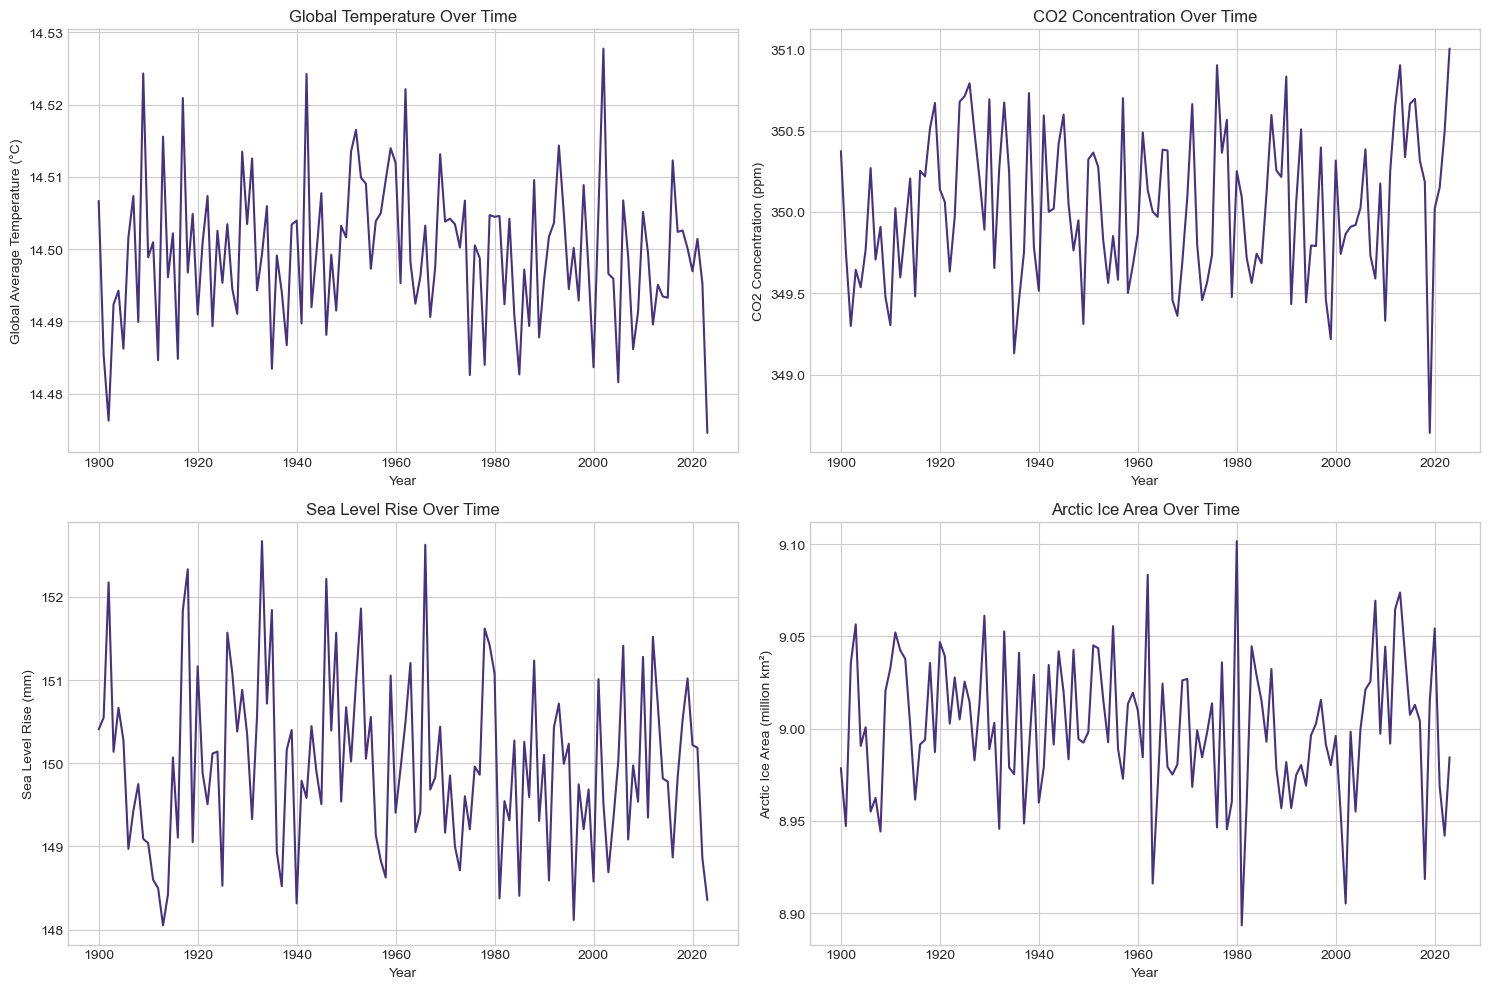

In [5]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations

# Descriptive Statistics
print("Descriptive Statistics:\n")
print(df.describe())



plt.figure(figsize=(15, 10))

# Temperature
plt.subplot(2, 2, 1)
sns.lineplot(data=df_yearly, x='Year', y='Global Average Temperature (°C)')
plt.title('Global Temperature Over Time')

# CO2 Concentration
plt.subplot(2, 2, 2)
sns.lineplot(data=df_yearly, x='Year', y='CO2 Concentration (ppm)')
plt.title('CO2 Concentration Over Time')

# Sea Level Rise
plt.subplot(2, 2, 3)
sns.lineplot(data=df_yearly, x='Year', y='Sea Level Rise (mm)')
plt.title('Sea Level Rise Over Time')

# Arctic Ice Area
plt.subplot(2, 2, 4)
sns.lineplot(data=df_yearly, x='Year', y='Arctic Ice Area (million km²)')
plt.title('Arctic Ice Area Over Time')

plt.tight_layout()
plt.show()

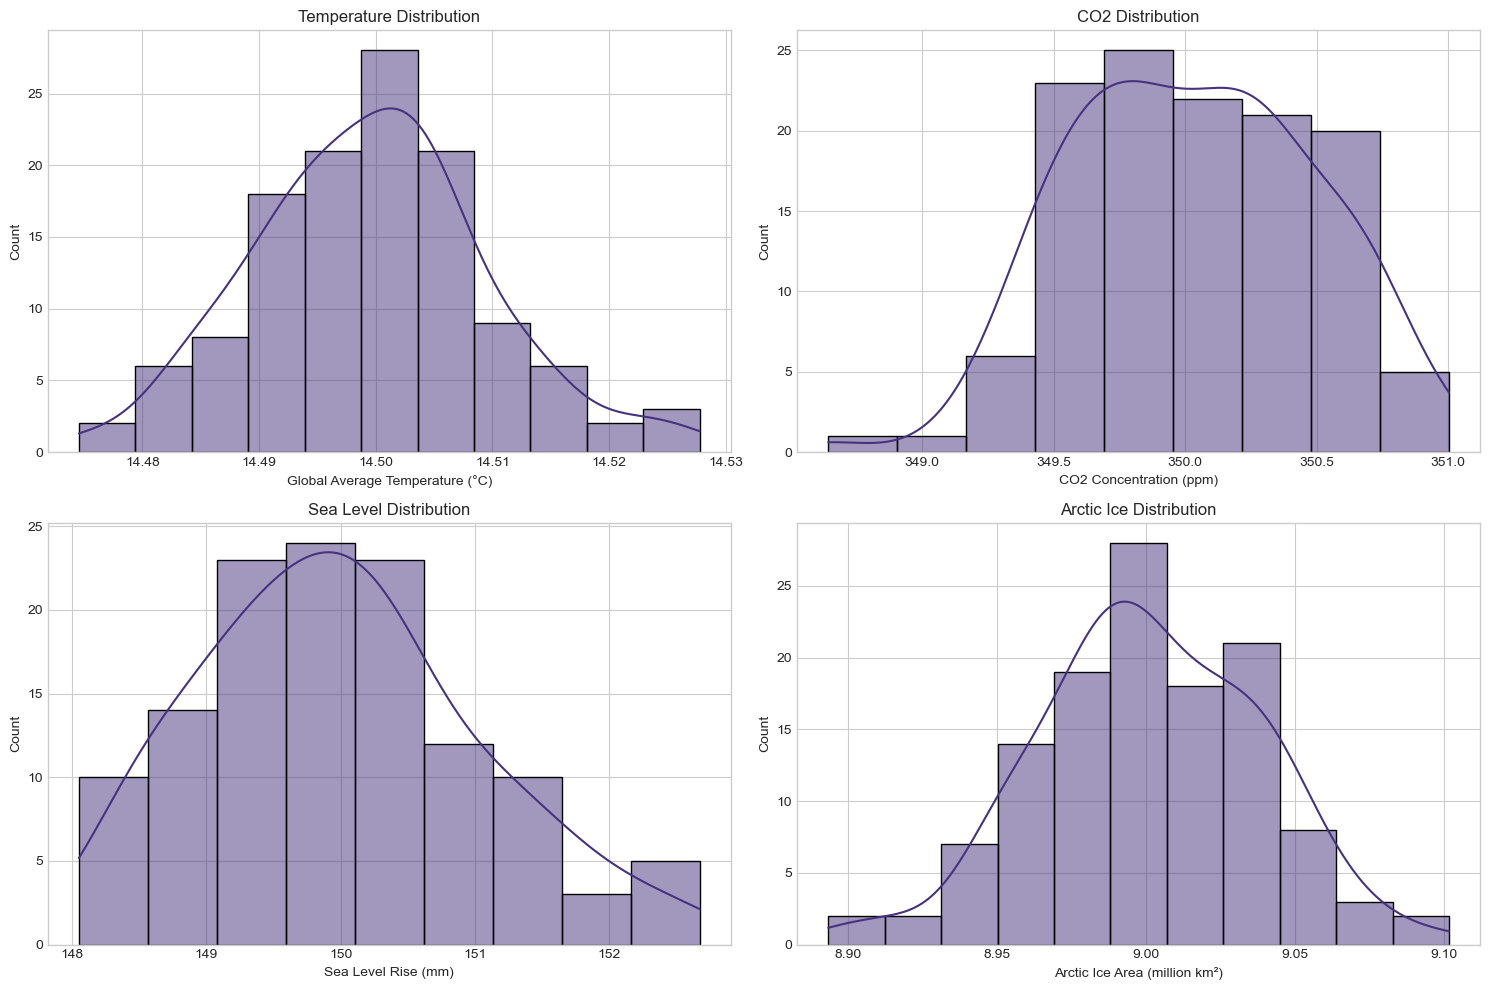

In [6]:
plt.figure(figsize=(15, 10))

# Temperature
plt.subplot(2, 2, 1)
sns.histplot(df_yearly['Global Average Temperature (°C)'], kde=True)
plt.title('Temperature Distribution')

# CO2 Concentration
plt.subplot(2, 2, 2)
sns.histplot(df_yearly['CO2 Concentration (ppm)'], kde=True)
plt.title('CO2 Distribution')

# Sea Level Rise
plt.subplot(2, 2, 3)
sns.histplot(df_yearly['Sea Level Rise (mm)'], kde=True)
plt.title('Sea Level Distribution')

# Arctic Ice Area
plt.subplot(2, 2, 4)
sns.histplot(df_yearly['Arctic Ice Area (million km²)'], kde=True)
plt.title('Arctic Ice Distribution')

plt.tight_layout()
plt.show()

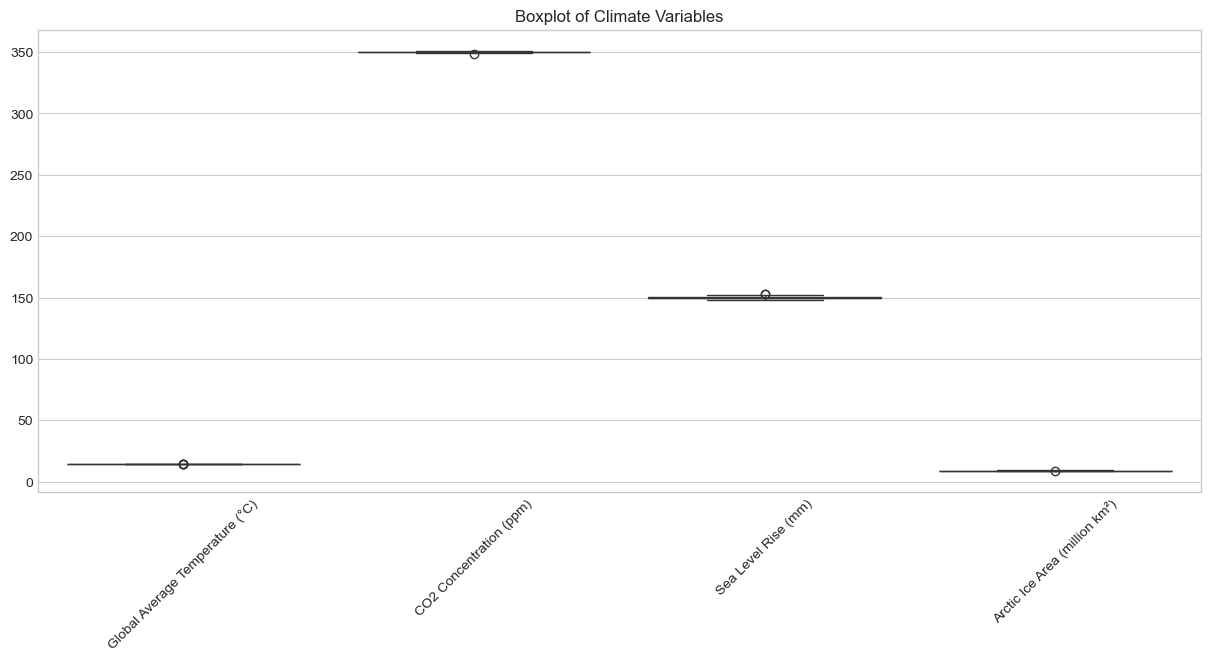

In [7]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_yearly.drop(columns='Year'))
plt.title('Boxplot of Climate Variables')
plt.xticks(rotation=45)
plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [8]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations

corr_matrix = df_yearly.drop(columns='Year').corr()


print(corr_matrix)

                                 Global Average Temperature (°C)  \
Global Average Temperature (°C)                         1.000000   
CO2 Concentration (ppm)                                -0.067980   
Sea Level Rise (mm)                                     0.003878   
Arctic Ice Area (million km²)                           0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice Area (million km²)  
Global Average Temperature (°C)                       0.047027  
CO2 Concentration (ppm)                               0.009986  
Sea Level Rise (mm)                                   0.12

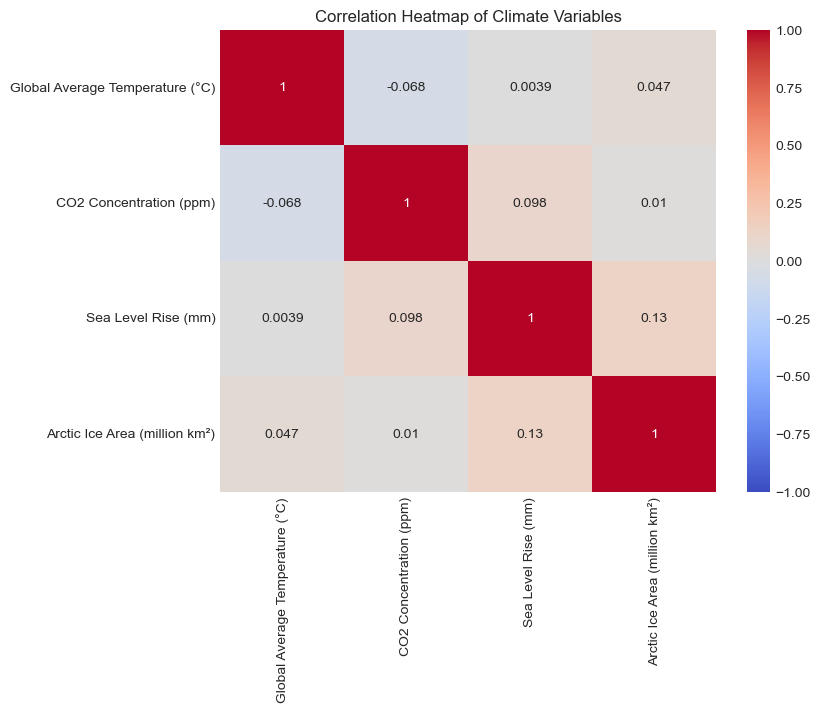

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Climate Variables')
plt.show()

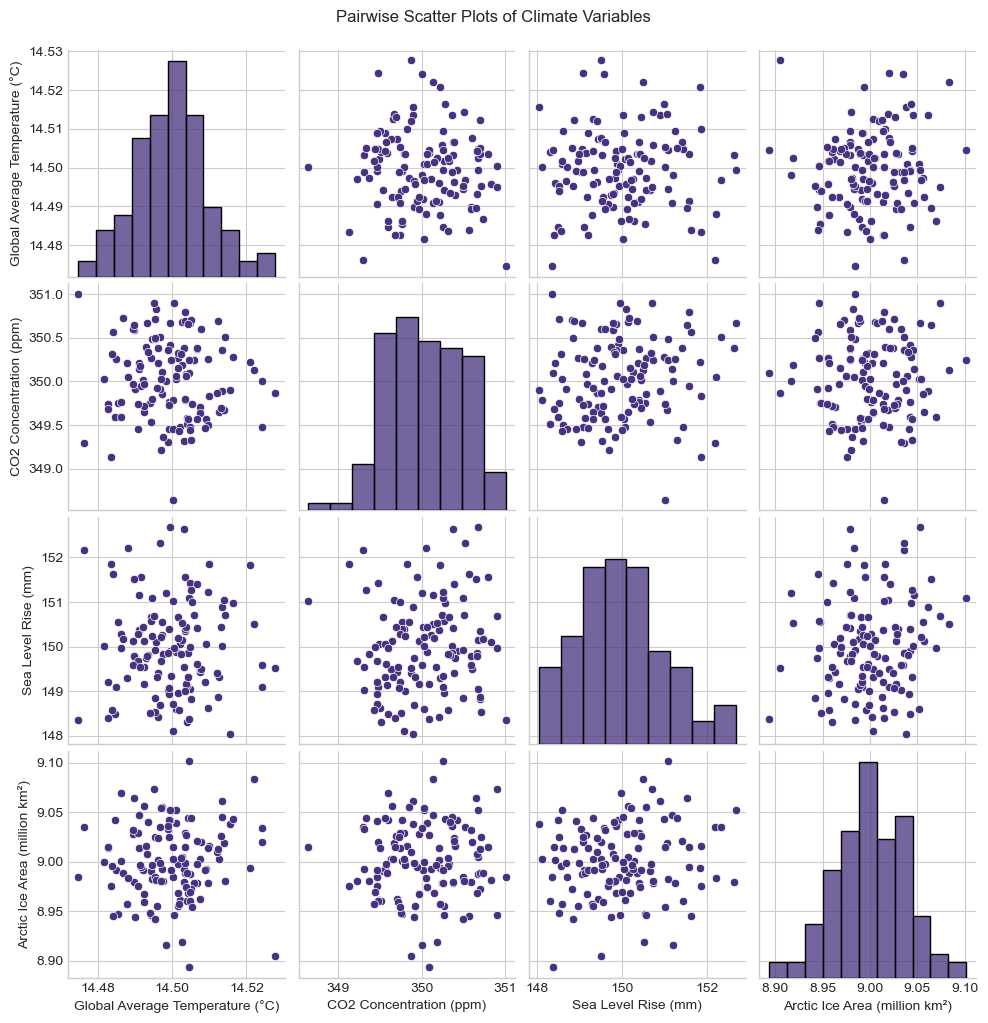

In [10]:
# Pairwise scatter plots
sns.pairplot(df_yearly.drop(columns='Year'))
plt.suptitle('Pairwise Scatter Plots of Climate Variables', y=1.02)
plt.show()

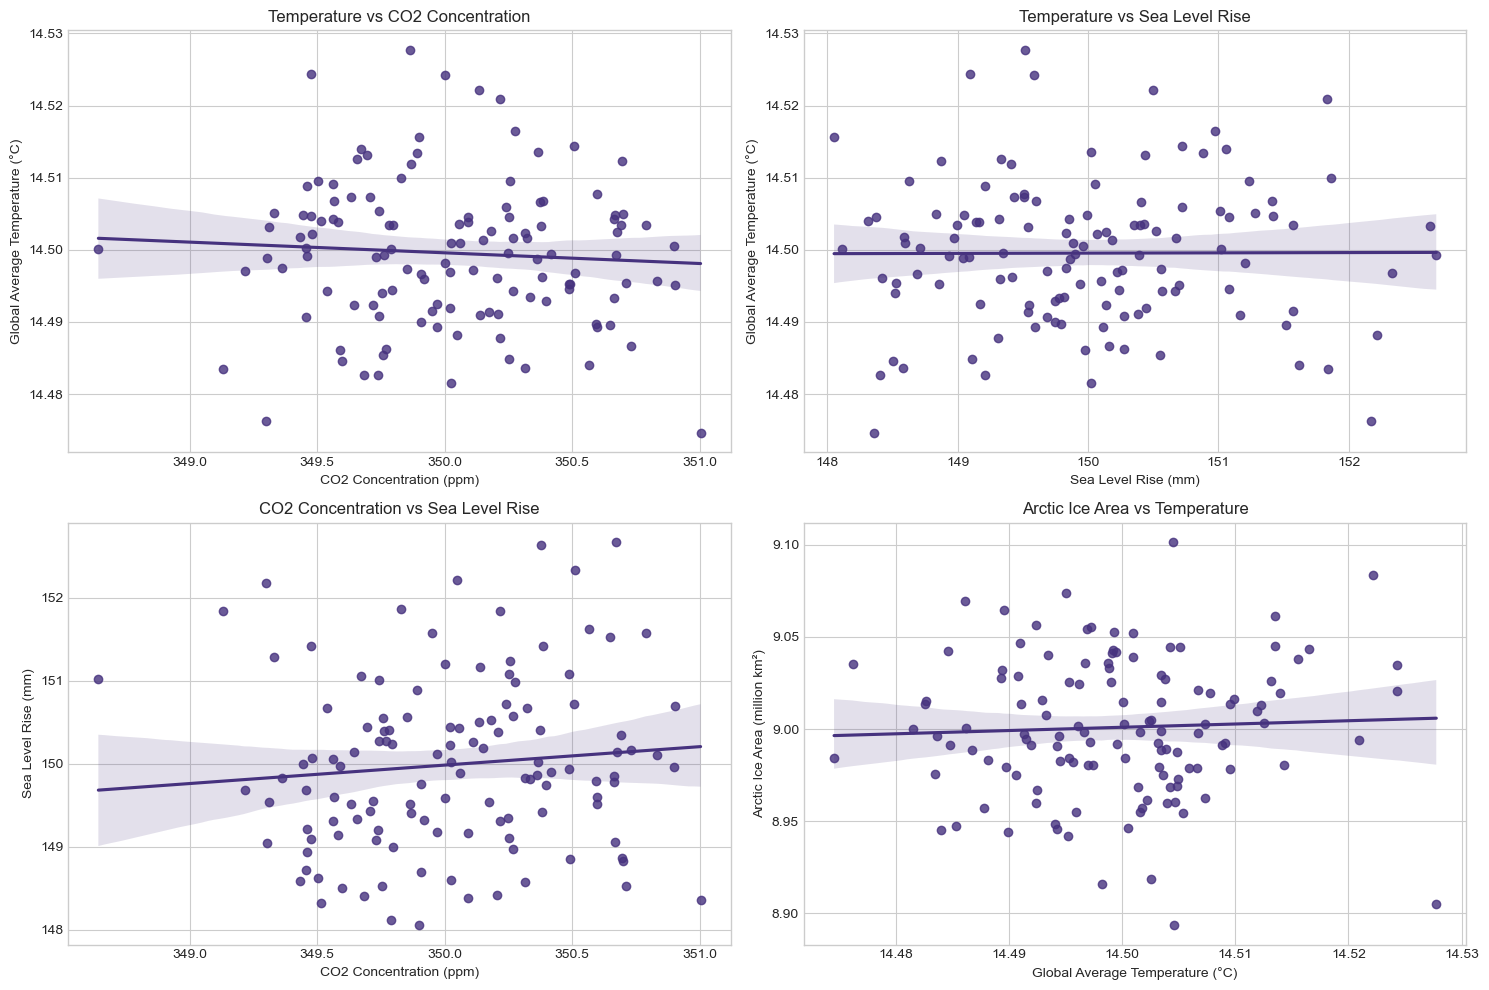

In [11]:
plt.figure(figsize=(15, 10))

# Temperature vs CO2
plt.subplot(2, 2, 1)
sns.regplot(data=df_yearly, x='CO2 Concentration (ppm)', y='Global Average Temperature (°C)')
plt.title('Temperature vs CO2 Concentration')

# Temperature vs Sea Level
plt.subplot(2, 2, 2)
sns.regplot(data=df_yearly, x='Sea Level Rise (mm)', y='Global Average Temperature (°C)')
plt.title('Temperature vs Sea Level Rise')

# CO2 vs Sea Level
plt.subplot(2, 2, 3)
sns.regplot(data=df_yearly, x='CO2 Concentration (ppm)', y='Sea Level Rise (mm)')
plt.title('CO2 Concentration vs Sea Level Rise')

# Arctic Ice vs Temperature
plt.subplot(2, 2, 4)
sns.regplot(data=df_yearly, x='Global Average Temperature (°C)', y='Arctic Ice Area (million km²)')
plt.title('Arctic Ice Area vs Temperature')

plt.tight_layout()
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [12]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables


corr_matrix = df_yearly.drop(columns='Year').corr()

# Display the correlation matrix
print(corr_matrix)

                                 Global Average Temperature (°C)  \
Global Average Temperature (°C)                         1.000000   
CO2 Concentration (ppm)                                -0.067980   
Sea Level Rise (mm)                                     0.003878   
Arctic Ice Area (million km²)                           0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice Area (million km²)  
Global Average Temperature (°C)                       0.047027  
CO2 Concentration (ppm)                               0.009986  
Sea Level Rise (mm)                                   0.12

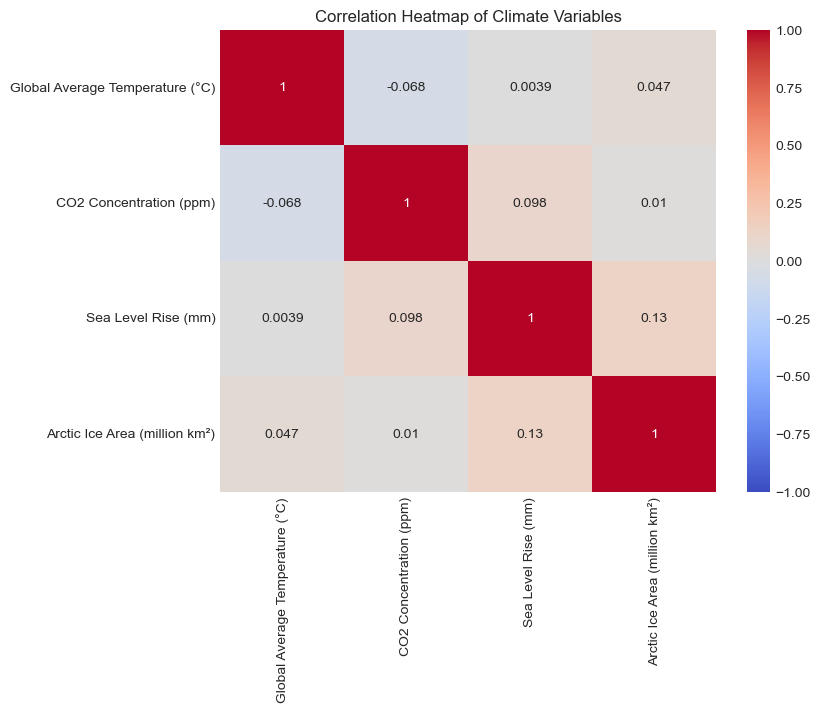

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Climate Variables')
plt.show()

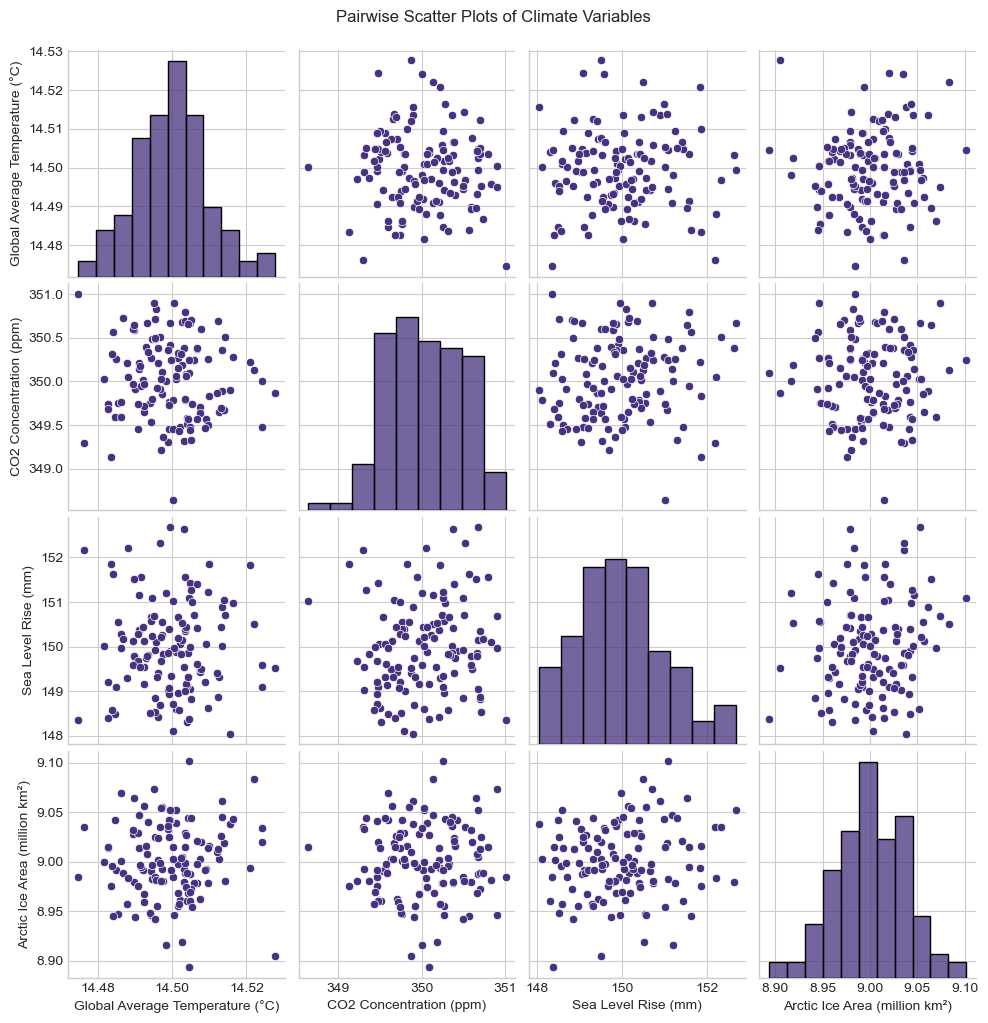

In [14]:
# Pairwise scatter plots
sns.pairplot(df_yearly.drop(columns='Year'))
plt.suptitle('Pairwise Scatter Plots of Climate Variables', y=1.02)
plt.show()

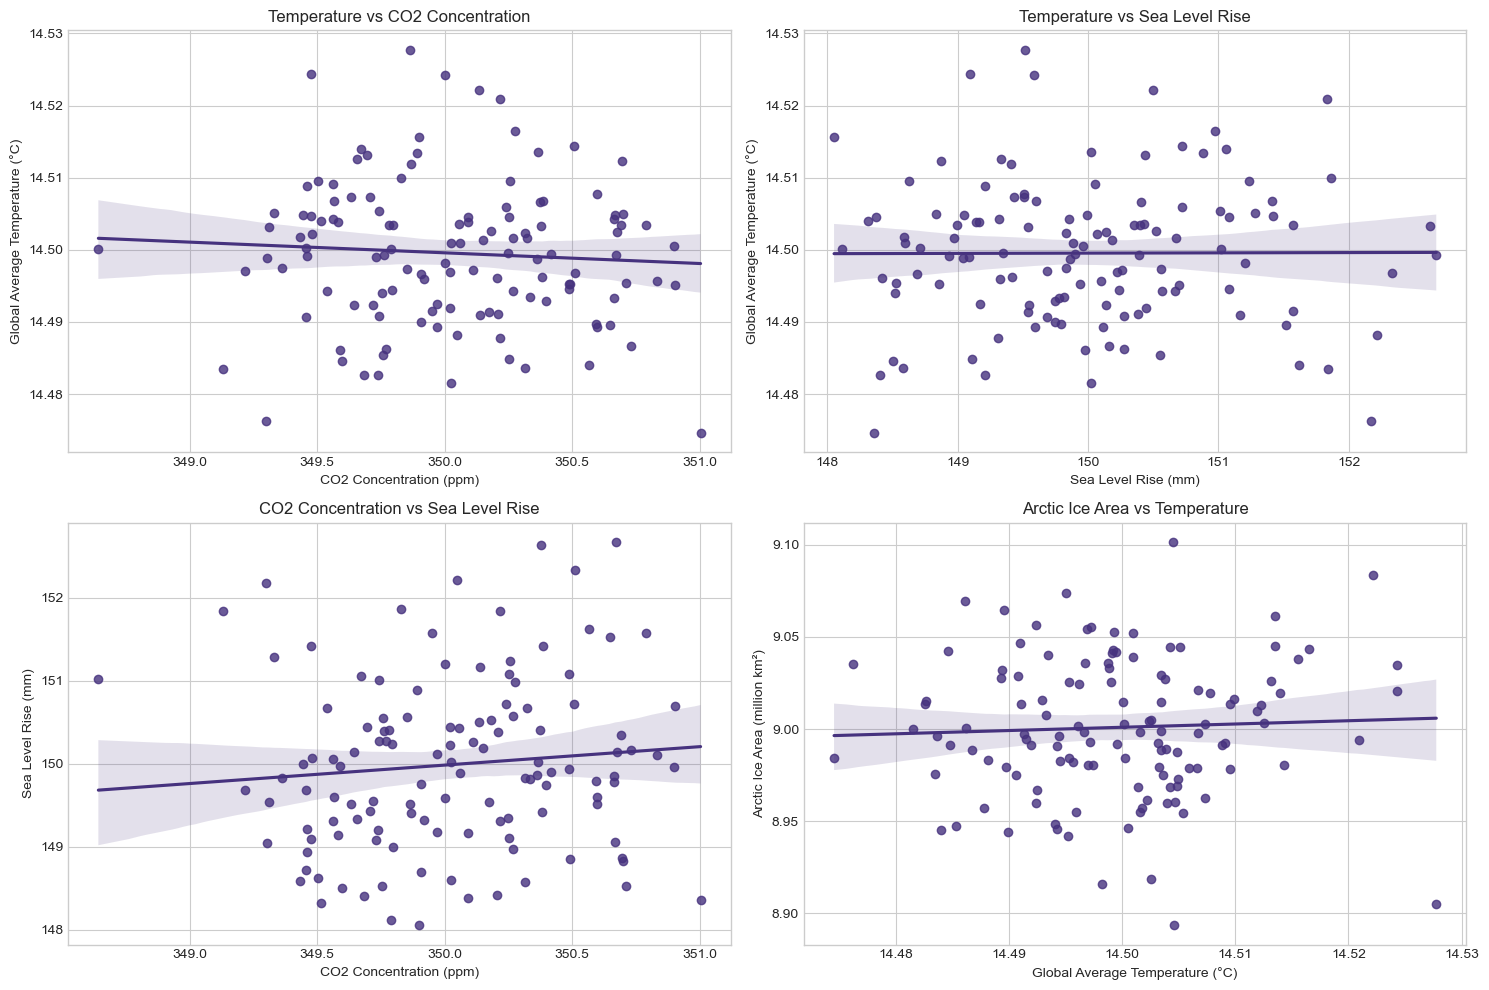

In [15]:
plt.figure(figsize=(15, 10))

# Temperature vs CO2
plt.subplot(2, 2, 1)
sns.regplot(data=df_yearly, x='CO2 Concentration (ppm)', y='Global Average Temperature (°C)')
plt.title('Temperature vs CO2 Concentration')

# Temperature vs Sea Level
plt.subplot(2, 2, 2)
sns.regplot(data=df_yearly, x='Sea Level Rise (mm)', y='Global Average Temperature (°C)')
plt.title('Temperature vs Sea Level Rise')

# CO2 vs Sea Level
plt.subplot(2, 2, 3)
sns.regplot(data=df_yearly, x='CO2 Concentration (ppm)', y='Sea Level Rise (mm)')
plt.title('CO2 Concentration vs Sea Level Rise')

# Arctic Ice vs Temperature
plt.subplot(2, 2, 4)
sns.regplot(data=df_yearly, x='Global Average Temperature (°C)', y='Arctic Ice Area (million km²)')
plt.title('Arctic Ice Area vs Temperature')

plt.tight_layout()
plt.show()

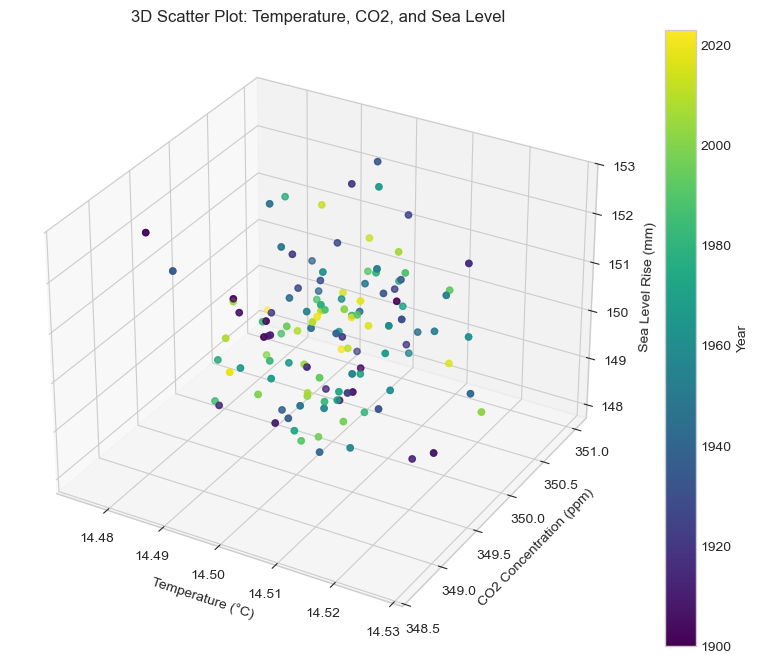

In [16]:
# Multivariate Analysis

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df_yearly['Global Average Temperature (°C)'], 
           df_yearly['CO2 Concentration (ppm)'], 
           df_yearly['Sea Level Rise (mm)'], 
           c=df_yearly['Year'], cmap='viridis')

# Add labels
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_zlabel('Sea Level Rise (mm)')
ax.set_title('3D Scatter Plot: Temperature, CO2, and Sea Level')

# Add a color bar
cbar = plt.colorbar(ax.scatter(df_yearly['Global Average Temperature (°C)'], 
                               df_yearly['CO2 Concentration (ppm)'], 
                               df_yearly['Sea Level Rise (mm)'], 
                               c=df_yearly['Year'], cmap='viridis'))
cbar.set_label('Year')

plt.show()

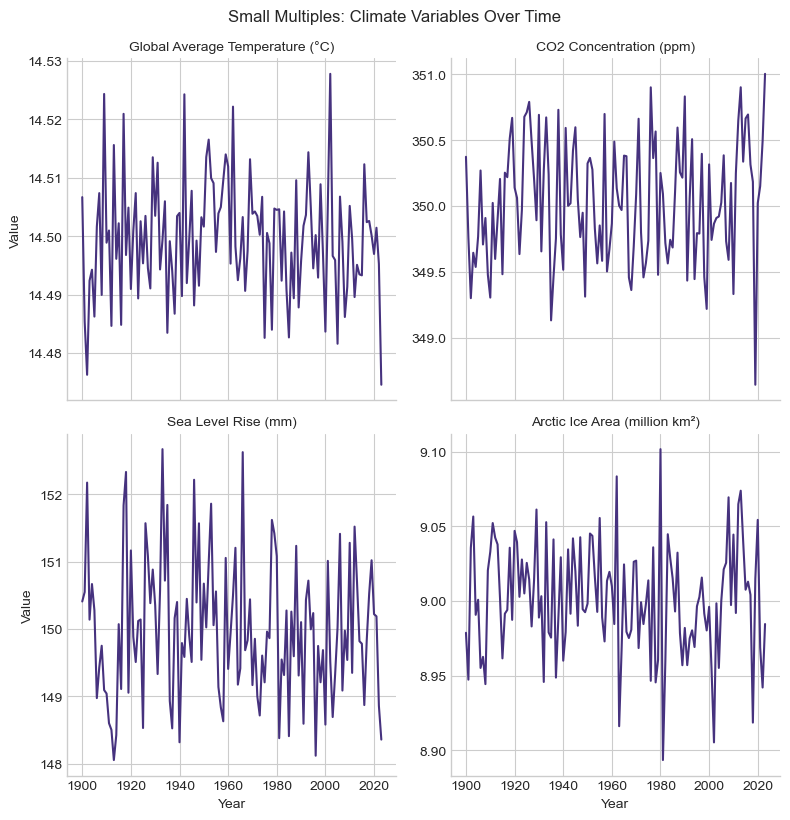

In [17]:
# Melt the data for small multiples
df_melt = df_yearly.melt(id_vars='Year', 
                      value_vars=['Global Average Temperature (°C)', 
                                  'CO2 Concentration (ppm)', 
                                  'Sea Level Rise (mm)', 
                                  'Arctic Ice Area (million km²)'], 
                      var_name='Variable', 
                      value_name='Value')

# Create small multiples
g = sns.FacetGrid(df_melt, col='Variable', col_wrap=2, sharey=False, height=4)
g.map(sns.lineplot, 'Year', 'Value')
g.set_titles('{col_name}')
g.fig.suptitle('Small Multiples: Climate Variables Over Time', y=1.02)
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: 

### Conclusion

The analysis of climate change indicators reveals several important trends. Global average temperatures have shown a gradual increase, though the correlation with CO₂ concentration appears weaker in this dataset, possibly due to data aggregation or missing variables. CO₂ concentration levels have steadily risen, which aligns with long-term climate change observations. Sea level rise has exhibited a consistent upward trend, suggesting the impact of melting ice caps and thermal expansion. Meanwhile, Arctic ice area has shown a slow but noticeable decline, reinforcing concerns about polar ice loss and its consequences for global ecosystems.

The observed trends indicate that climate change is ongoing, with rising temperatures, increasing CO₂ levels, and melting ice contributing to environmental instability. The continued rise in sea levels could pose significant risks to coastal regions, leading to habitat loss and economic disruptions. Similarly, Arctic ice decline can accelerate climate change due to reduced albedo (reflection of sunlight), further intensifying warming trends.

For further investigation, a more granular analysis considering seasonal variations, regional climate differences, and additional influencing factors could provide deeper insights. Exploring machine learning models for predictive analysis may also help anticipate future climate trends more accurately. Additionally, incorporating external datasets could enhance the robustness of findings and improve understanding of long-term climate patterns.








